In [1]:
import numpy as np
import sys
import os
import glob
import getpass
import argparse
import pickle
import matplotlib.cm as cm
import pandas as pd
import matplotlib.pyplot as plt
import collections 
def makehash():
    return collections.defaultdict(makehash)
import fnmatch 
import torch 
from tqdm import tqdm 
from utils import save_dir, analyze_dir, result_dir,train_pool
import scipy.spatial.distance as dist
from tqdm import tqdm
import re
from sklearn.manifold import TSNE
from utils.analysis_utils import analyze_pool

def moving_average(x,w):
    w_min=1#int(np.floor(w/2))
    return pd.Series(x).rolling(w, min_periods=w_min).mean()
av_window=10

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [2]:
model_identifier = 'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed'
train_identifier = 'epochs-10_batch-32_lr-0.01_momentum-0.5_init-gaussian_std-1e-06'
analyze_identifier='mftma-exm_per_class=50-proj=False-rand=True-kappa=1e-08-n_t=300-n_rep=5'
#epochs-10_batch-32_lr-0.001_momentum-0.5_init-gaussian_std-0.0001
#                           epochs-10_batch-32_lr-0.002_momentum-0.6_init-gaussian_std-1e-05 \
#                           epochs-10_batch-32_lr-0.01_momentum-0.5_init-gaussian_std-1e-06 

In [3]:
# load training data 
training_files=[]
for file in os.listdir(os.path.join(save_dir,model_identifier,train_identifier)):
    if fnmatch.fnmatch(file, '*.pth'):
            training_files.append(os.path.join(save_dir,model_identifier,train_identifier,file))

In [4]:
grad_pkl_files = []
for file in os.listdir(os.path.join(save_dir,analyze_identifier,model_identifier,train_identifier)):
    if fnmatch.fnmatch(file, '*gradient_data.pkl'):
        grad_pkl_files.append(os.path.join(save_dir,analyze_identifier,model_identifier,train_identifier,file))
s = [re.findall('/\d+', x) for x in grad_pkl_files]
s = [item for sublist in s for item in sublist]
dummy_id = [(x.split('/')) for x in s]
file_id = [int(x.split('/')[1]) for x in s]
sorted_files = [grad_pkl_files[x] for x in np.argsort(file_id)]
grad_pkl_files=sorted_files

## Hierarchical accuracies

In [5]:
hier_accu=[]
test_predictions=[]
test_probabilites=[]
test_grad_dict=[]
for idx, files in tqdm(enumerate(training_files)):
    test=torch.load(files)
    hier_accu.append([test['epoch'],test['batchidx'], test['hier_test_acc']])
    test_predictions.append([test['target_test'], test['pred_test']])
    test_probabilites.append( test['pred_test_prob'])
    test_grad_dict.append(test['grad_dict'])
    
dummy=[]
epochs=[]
batches=[]
for item in hier_accu:
    epochs.append(item[0])
    batches.append(item[1])
    dummy.append(item[0]*10000+item[1])
fixed_idx=np.argsort(dummy)

1060it [00:32, 32.54it/s]


In [6]:
np.asarray(epochs)

array([ 1,  1,  1, ..., 10, 10, 10])

In [7]:
epoch_factor=1e3*np.ceil(np.max(batches)/1e3)
epoch_batch=epoch_factor*np.asarray(epochs)+np.asarray(batches)
x_bar= np.arange(len(epoch_batch))/len(epoch_batch)
epoch_bar=np.argwhere(np.diff(np.asarray(epochs)))/(len(epoch_batch))
epoch_bar

array([[0.0990566],
       [0.1990566],
       [0.2990566],
       [0.3990566],
       [0.4990566],
       [0.5990566],
       [0.6990566],
       [0.7990566],
       [0.8990566]])

array([0.00000000e+00, 9.43396226e-04, 1.88679245e-03, ...,
       9.97169811e-01, 9.98113208e-01, 9.99056604e-01])

In [8]:
params = train_pool[model_identifier]()
params.load_dataset()



<HDF5 dataset "data": shape (128252,), type "|u1"> is not a matlab type
<HDF5 dataset "ir": shape (128252,), type "<u8"> is not a matlab type
<HDF5 dataset "jc": shape (64128,), type "<u8"> is not a matlab type
data type not supported: graph, uint32
data type not supported: graph, uint32


In [9]:
gradient_pool_files=[]
for file in os.listdir(os.path.join(save_dir,analyze_identifier,model_identifier,train_identifier)):
    if fnmatch.fnmatch(file, '*Linear_gradient_pooled.pkl'):
            gradient_pool_files.append(os.path.join(save_dir,analyze_identifier,model_identifier,train_identifier,file))

In [10]:
gradient_pool_files

['/mindhive/evlab/u/Shared/Greta_Eghbal_manifolds/extracted/mftma-exm_per_class=50-proj=False-rand=True-kappa=1e-08-n_t=300-n_rep=5/NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed/epochs-10_batch-32_lr-0.01_momentum-0.5_init-gaussian_std-1e-06/NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed_layer_1_Linear_gradient_pooled.pkl',
 '/mindhive/evlab/u/Shared/Greta_Eghbal_manifolds/extracted/mftma-exm_per_class=50-proj=False-rand=True-kappa=1e-08-n_t=300-n_rep=5/NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed/epochs-10_batch-32_lr-0.01_momentum-0.5_init-gaussian_std-1e-06/NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed_layer_2_Linear_gradient_pooled.pkl',
 '/mindhive/evlab/u/Shared/Greta_Eghbal_manifolds/extracted/mftma-exm_per_class=50-proj=False-rand=True-kappa=1e-08-n_t=300-n_rep=5/NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161

In [11]:
gradient_results=pickle.load(open(gradient_pool_files[2],'rb'))


In [12]:
gradient_results['gradient_results']['layer_3_Linear']

KeyError: 'layer_3_Linear'

In [13]:
gradient_results=pickle.load(open(gradient_pool_files[2],'rb'))

#layer_inspect=gradient_results['layer']
#gradient_results=gradient_results['gradient_results']

gradient_results=pickle.load(open(gradient_pool_files[2],'rb'))

gradient_results


{'analyze_identifier': 'mftma-exm_per_class=50-proj=False-rand=True-kappa=1e-08-n_t=300-n_rep=5',
 'model_identifier': 'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed',
 'train_identifier': 'epochs-10_batch-32_lr-0.01_momentum-0.5_init-gaussian_std-1e-06',
 'layer': 'layer_3_Linear',
 'gradient_results': {'hier_0': array([[7.7230080e-19, 6.3792215e-19, 3.8984544e-19, ..., 4.8914043e-19,
          2.7106486e-19, 4.3644815e-19],
         [9.4174978e-19, 1.0153025e-18, 1.1990240e-19, ..., 6.1434807e-19,
          1.0053652e-18, 8.6854337e-19],
         [6.0614089e-19, 8.0605514e-19, 4.6008060e-19, ..., 5.6402794e-19,
          5.0900321e-19, 8.6460237e-19],
         ...,
         [3.1230171e-11, 1.3169858e-11, 1.6921704e-11, ..., 5.2763328e-11,
          1.5361108e-11, 4.1328312e-11],
         [4.8180085e-15, 6.2990583e-15, 2.3369722e-15, ..., 2.6504574e-15,
          3.4987136e-15, 6.8952095e-15],
         [1.6559793e-12, 2.2311277e-13, 1.8787553e

In [64]:
gradient_results=pickle.load(open(gradient_pool_files[1],'rb'))
layer_inspect=gradient_results['layer']
gradient_results=gradient_results['gradient_results']
xmin=0
xmax=1
av_window=20
num_colors=len(gradient_results.keys())+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))
fig=plt.figure(1,figsize=(15,12),dpi=200,frameon=False)
ax1=plt.axes((.05,.7,.35,.2))
for idx,key in enumerate(gradient_results.keys()):
    ax1.plot(moving_average(x_bar,av_window),moving_average(np.mean(gradient_results[key],axis=1),av_window),label=key,color=line_cols[idx,:])
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()
ax1.vlines(epoch_bar,ax1.get_ylim()[0],ax1.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.autoscale(enable=True, axis='y', tight=True)
ax1.set_xlim((xmin,xmax))
ax1.set_title(layer_inspect)


KeyError: 'layer'

In [19]:

gradient_results=pickle.load(open(gradient_pool_files[0],'rb'))
gradient_results_L1=gradient_results['gradient_results']


gradient_results=pickle.load(open(gradient_pool_files[1],'rb'))
gradient_results_L2=gradient_results['gradient_results']


gradient_results=pickle.load(open(gradient_pool_files[2],'rb'))
gradient_results_L3=gradient_results['gradient_results']


In [20]:
gradient_results=pickle.load(open(gradient_pool_files[1],'rb'))
gradient_results=gradient_results['gradient_results']['layer_3_Linear']

xmin=0
xmax=1
av_window=20
num_colors=len(gradient_results.keys())+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))
fig=plt.figure(1,figsize=(15,12),dpi=200,frameon=False)
ax1=plt.axes((.05,.7,.35,.2))
for idx,key in enumerate(gradient_results.keys()):
    ax1.plot(moving_average(x_bar,av_window),moving_average(np.mean(gradient_results[key],axis=1),av_window),label=key,color=line_cols[idx,:])
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()
ax1.vlines(epoch_bar,ax1.get_ylim()[0],ax1.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.autoscale(enable=True, axis='y', tight=True)
ax1.set_xlim((xmin,xmax))
ax1.set_title('layer_3_Linear')



KeyError: 'layer_3_Linear'

Text(0.5, 1.0, 'layer_3_Linear')

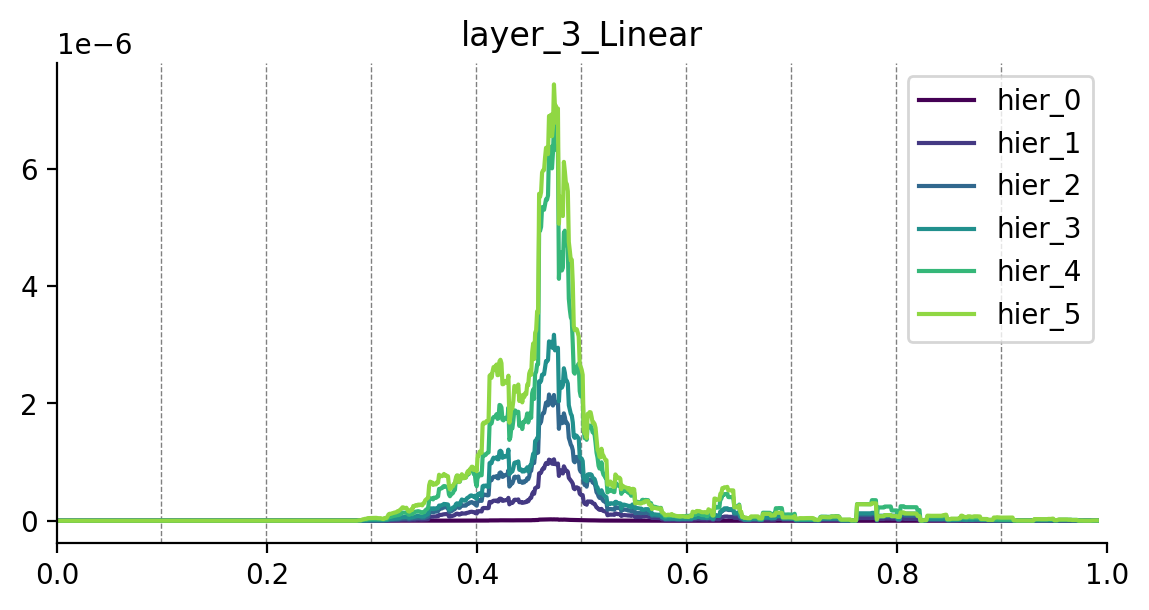

In [50]:
gradient_results=pickle.load(open(gradient_pool_files[2],'rb'))
layer_inspect=gradient_results['layer']
gradient_results=gradient_results['gradient_results']
xmin=0
xmax=1
av_window=20
num_colors=len(gradient_results.keys())+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))
fig=plt.figure(1,figsize=(15,12),dpi=200,frameon=True)
ax1=plt.axes((.05,.7,.35,.2))
for idx,key in enumerate(gradient_results.keys()):
    ax1.plot(moving_average(x_bar,av_window),moving_average(np.mean(gradient_results[key],axis=1),av_window),label=key,color=line_cols[idx,:])
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()
ax1.vlines(epoch_bar,ax1.get_ylim()[0],ax1.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.autoscale(enable=True, axis='y', tight=True)
ax1.set_xlim((xmin,xmax))
ax1.set_title(layer_inspect)



In [22]:
av_window=20
num_colors=len(gradient_results_L2.keys())+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))

In [23]:
hier_keys=list(gradient_results_L1.keys())
hier_keys

['hier_0', 'hier_1', 'hier_2', 'hier_3', 'hier_4', 'hier_5']

In [24]:
all_grads=[gradient_results_L1,gradient_results_L2,gradient_results_L3]

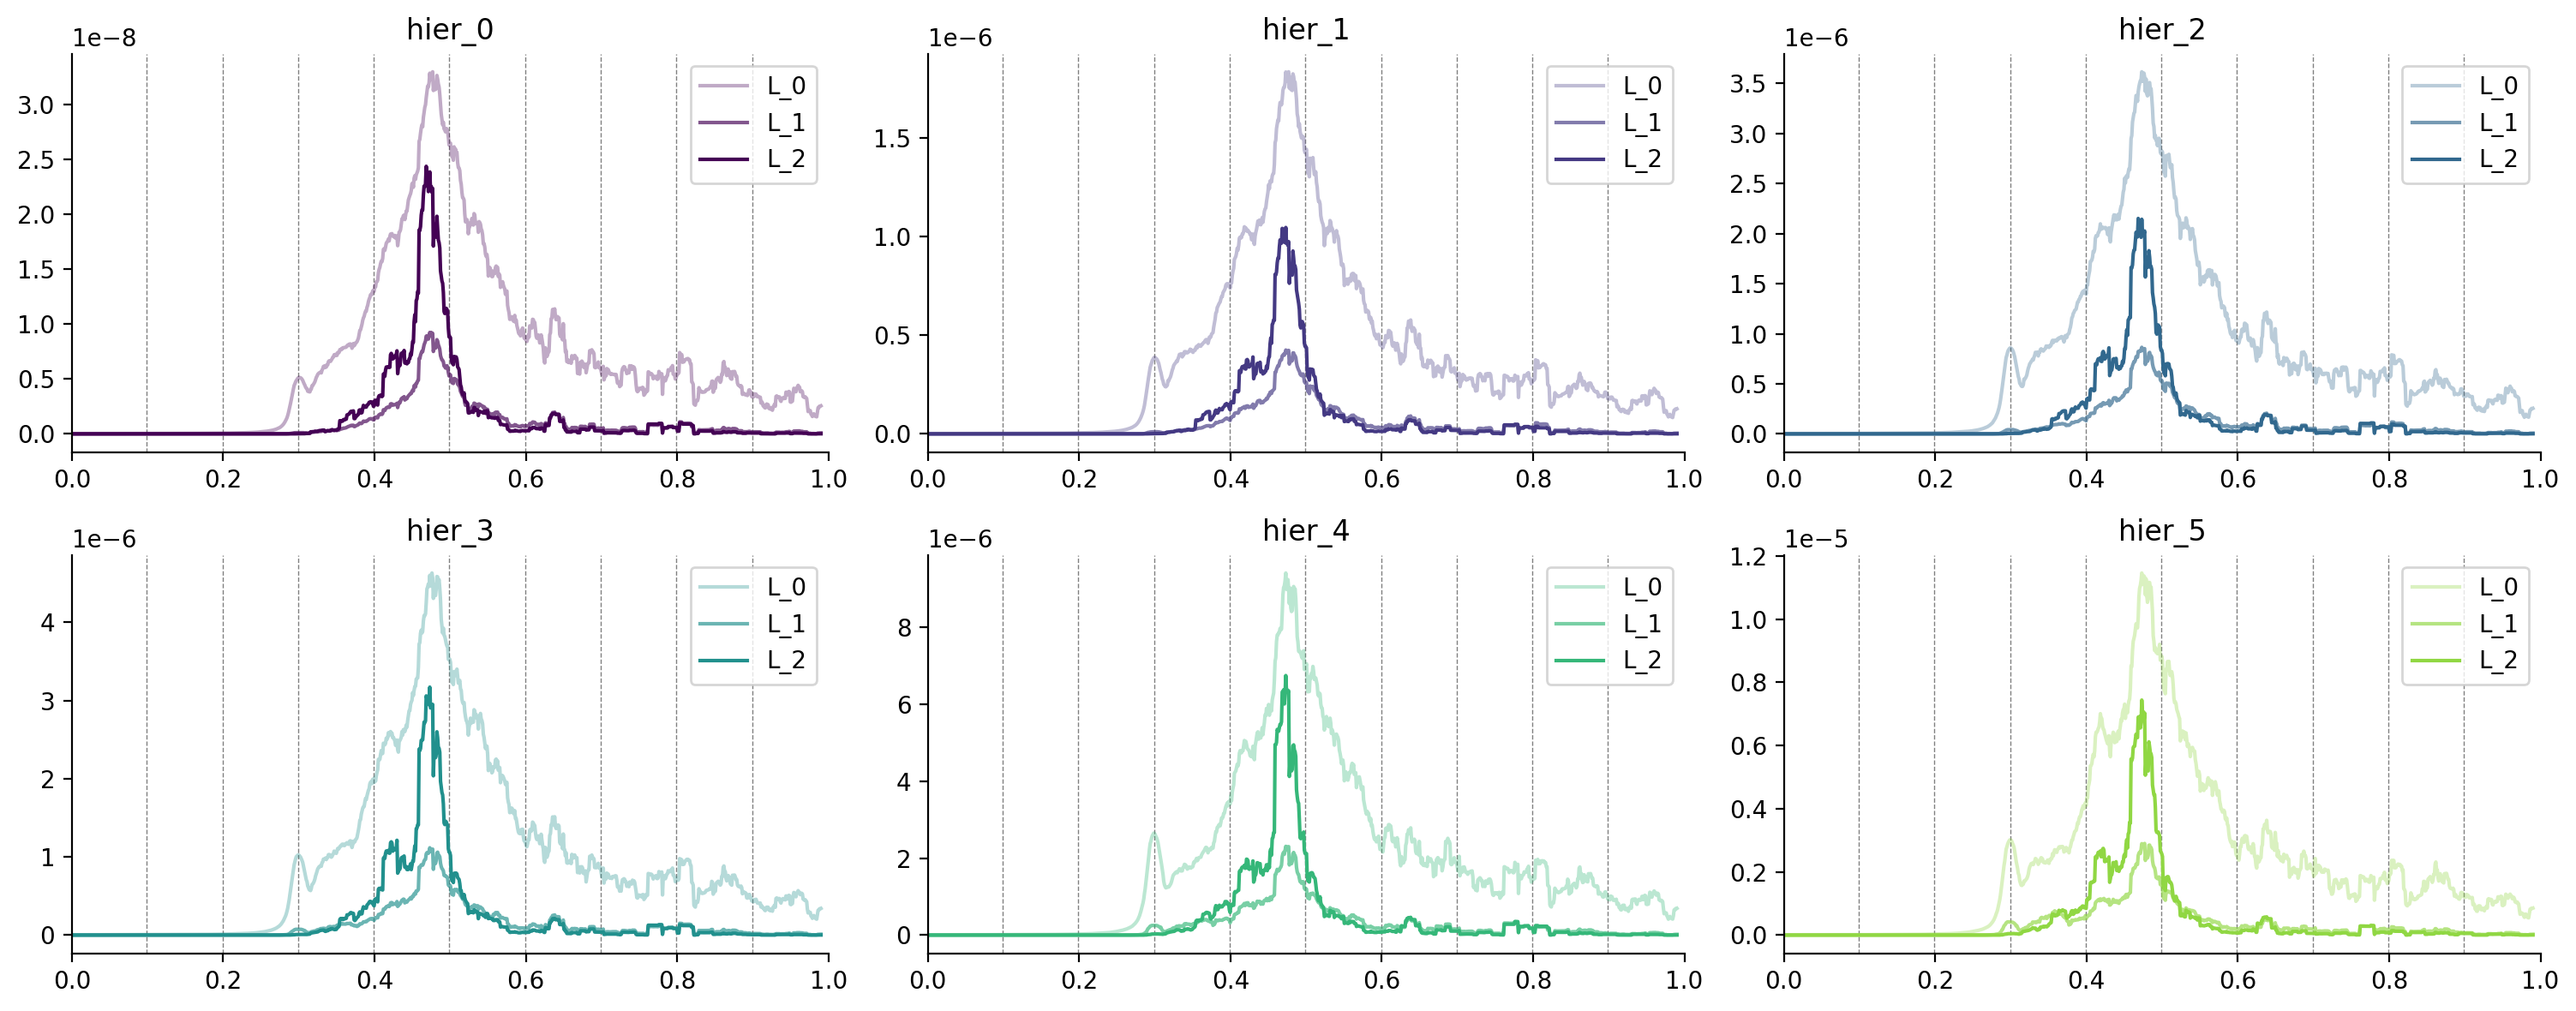

In [51]:
xmin=0
xmax=1
av_window=20
fig=plt.figure(1,figsize=(15,6),dpi=200,frameon=True)
for idx, hier in enumerate(hier_keys):
    ax1=plt.subplot(2,3,idx+1)
    #ax1=plt.subplot(2,3,1)
    hier_res=[x[hier] for x in all_grads]
    for idy,res in enumerate(hier_res):
        ax1.plot(moving_average(x_bar,av_window),moving_average(np.mean(res,axis=1),av_window),label=f"L_{idy}",color=line_cols[idx,:],linewidth=1.5,alpha=(idy+1)/3)
    ax1.legend()
    ax1.set_title(hier)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    ax1.vlines(epoch_bar,ax1.get_ylim()[0],ax1.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
    ax1.autoscale(enable=True, axis='x', tight=True)
    ax1.autoscale(enable=True, axis='y', tight=True)
    ax1.set_xlim((xmin,xmax))




#ax1=plt.subplot(2,3,(7,8)
plt.tight_layout()


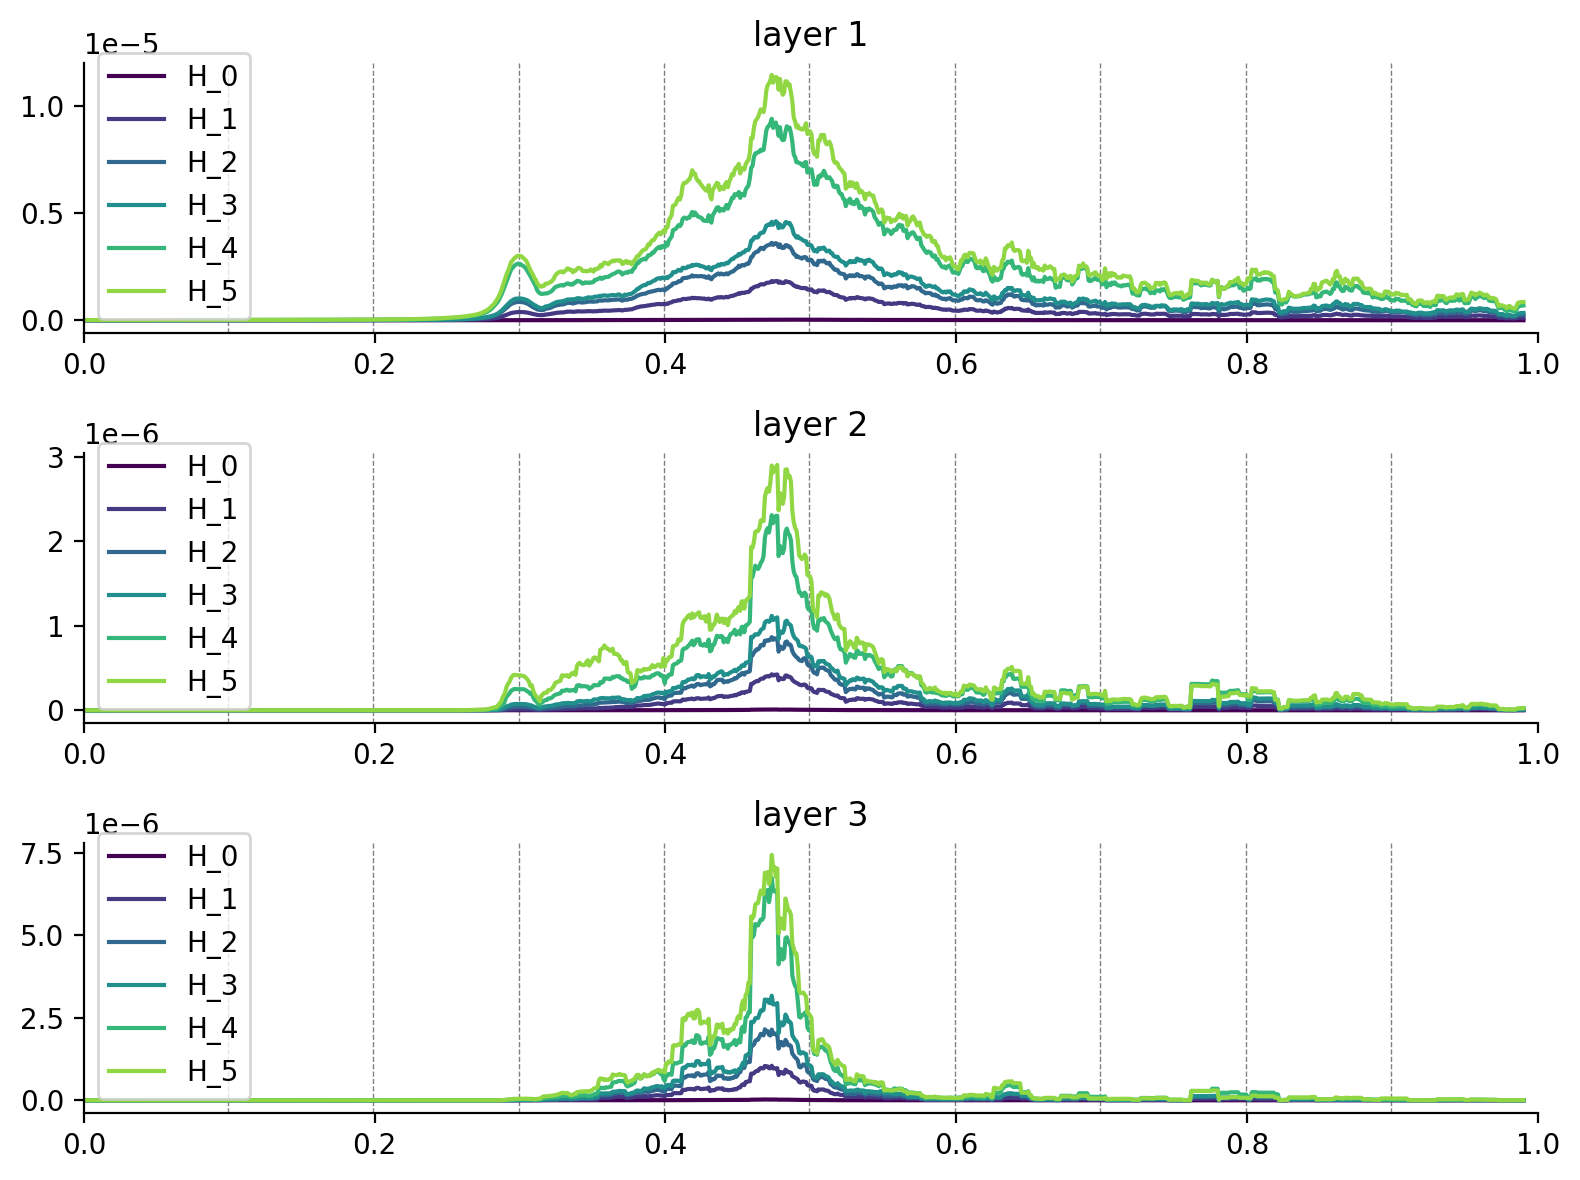

In [52]:
xmin=0
xmax=1
av_window=20
fig=plt.figure(1,figsize=(8,6),dpi=200,frameon=False)
for idx, layer_res in enumerate(all_grads):
    ax1=plt.subplot(3,1,idx+1)
    #ax1=plt.subplot(2,3,1)

    for idy,hier_keu in enumerate(layer_res):
        res=layer_res[hier_keu]
        ax1.plot(moving_average(x_bar,av_window),moving_average(np.mean(res,axis=1),av_window),label=f"H_{idy}",color=line_cols[idy,:],linewidth=1.5)
    ax1.legend()
    ax1.set_title(f"layer {idx+1}")
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    ax1.vlines(epoch_bar,ax1.get_ylim()[0],ax1.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
    ax1.autoscale(enable=True, axis='x', tight=True)
    ax1.autoscale(enable=True, axis='y', tight=True)
    ax1.set_xlim((xmin,xmax))




#ax1=plt.subplot(2,3,(7,8)
plt.tight_layout()

In [43]:
line_cols

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.267968, 0.223549, 0.512008, 1.      ],
       [0.190631, 0.407061, 0.556089, 1.      ],
       [0.128729, 0.563265, 0.551229, 1.      ],
       [0.20803 , 0.718701, 0.472873, 1.      ],
       [0.565498, 0.84243 , 0.262877, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

# compute the average gradients 

In [14]:
grad_pkl_files = []
for file in os.listdir(os.path.join(save_dir, analyze_identifier, model_identifier, train_identifier)):
        if fnmatch.fnmatch(file, '*gradient_data.pkl'):
            grad_pkl_files.append(os.path.join(save_dir, analyze_identifier, model_identifier, train_identifier, file))
s = [re.findall('/\d+', x) for x in grad_pkl_files]
s = [item for sublist in s for item in sublist]
dummy_id = [(x.split('/')) for x in s]
file_id = [int(x.split('/')[1]) for x in s]
sorted_files = [grad_pkl_files[x] for x in np.argsort(file_id)]
grad_pkl_files = sorted_files

params = train_pool[model_identifier]()
params.load_dataset()
layer_names = params.get_layer_names()[1:]
transfo_mat = params.dataset.transformation_mats
analyze_params = analyze_pool[analyze_identifier]()
tiled_transfo_mat = [np.tile(x, (1, analyze_params.exm_per_class)).reshape(-1, x.shape[1]) for x in transfo_mat]


<HDF5 dataset "data": shape (128252,), type "|u1"> is not a matlab type
<HDF5 dataset "ir": shape (128252,), type "<u8"> is not a matlab type
<HDF5 dataset "jc": shape (64128,), type "<u8"> is not a matlab type
data type not supported: graph, uint32
data type not supported: graph, uint32


In [15]:
layer_gradient_dict=dict()
for layer in layer_names:
    print(f"analyzing {layer} \n")
    layer_branch_data=dict()
    all_grad_data = []
        # method 1 , only analyze leaf node.
    for idx, file in tqdm(enumerate(grad_pkl_files)):
        g = pickle.load(open(file, 'rb'))
        e = np.asarray(g['results'][0][layer]).squeeze()
        all_grad_data.append(e)
    e_f_list = [np.reshape(x, [-1, x.shape[2]]) for x in all_grad_data]


1it [00:00,  6.24it/s]

analyzing layer_1_Linear 



1060it [03:59,  4.43it/s]
4it [00:00, 31.49it/s]

analyzing layer_2_Linear 



741it [00:23, 31.29it/s]


KeyboardInterrupt: 

In [38]:
hier_class_index=[[np.where(x==1) for x in y.transpose()] for y in tiled_transfo_mat]

In [69]:
training_l2=[]
for class_idx in hier_class_index:
    l_2_vectors=[]
    for e_f in e_f_list:
        first_level_grp=[e_f[idx] for idx in  class_idx]
        l_2_vectors.append(np.stack([x.mean(axis=0) for x in first_level_grp]).mean(axis=0))
    training_l2.append([np.linalg.norm(x) for x in l_2_vectors])

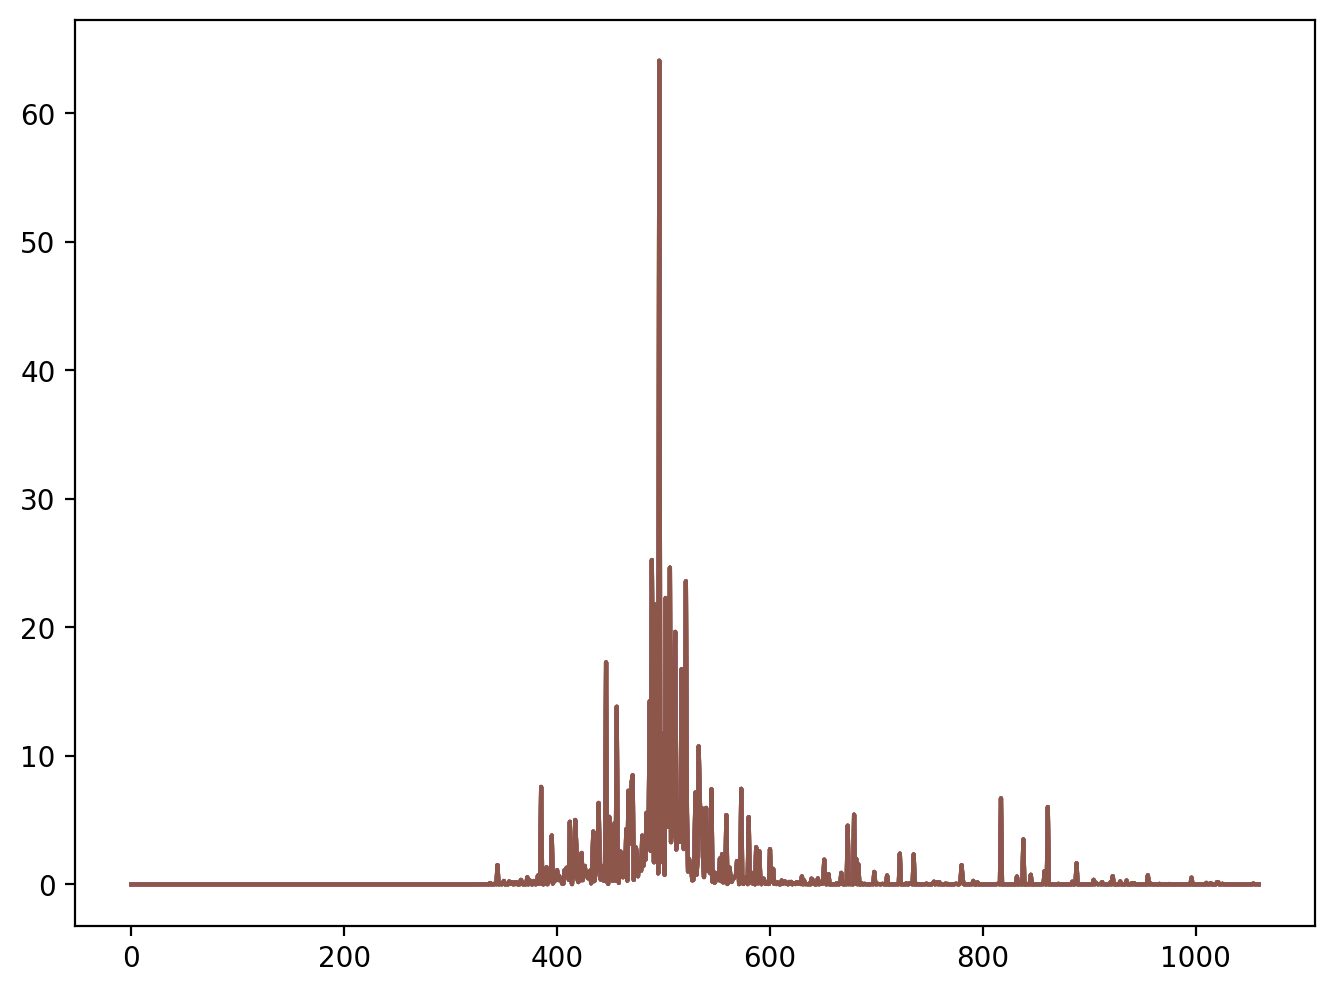

In [74]:
fig=plt.figure(1,figsize=(8,6),dpi=200,frameon=False)
plt.plot(np.stack(training_l2).transpose())

In [73]:
np.stack(training_l2)

(6, 1060)

In [16]:
# doing it the second way 
layer_names = params.get_layer_names()[1:]
layer_names

['layer_1_Linear', 'layer_2_Linear', 'layer_3_Linear']

In [ ]:
layer_gradient_dict=dict()
for layer in layer_names:
    print(f"analyzing {layer} \n")
    layer_branch_data=dict()
    all_grad_data = []
        # method 1 , only analyze leaf node.
    for idx, file in tqdm(enumerate(grad_pkl_files)):
        g = pickle.load(open(file, 'rb'))
        e = [np.asarray(x[layer]).squeeze() for x in g['results']]
        all_grad_data.append(e)
        if idx==0: 
            print(f'e shape: {np.shape(e)}')

    e_=[[x.mean(axis=1) for x in y ] for y in all_grad_data]
    print(f'e_ shape {e_[0]}')
    layer_gradient_dict[layer]=e_



In [20]:
np.shape(e[1])
np.shape(e_[1][1])

(32, 64)

In [21]:
av_window=20
num_colors=6+1
h0=cm.get_cmap('viridis_r',num_colors)
line_cols=np.flipud(h0(np.arange(num_colors)/num_colors))

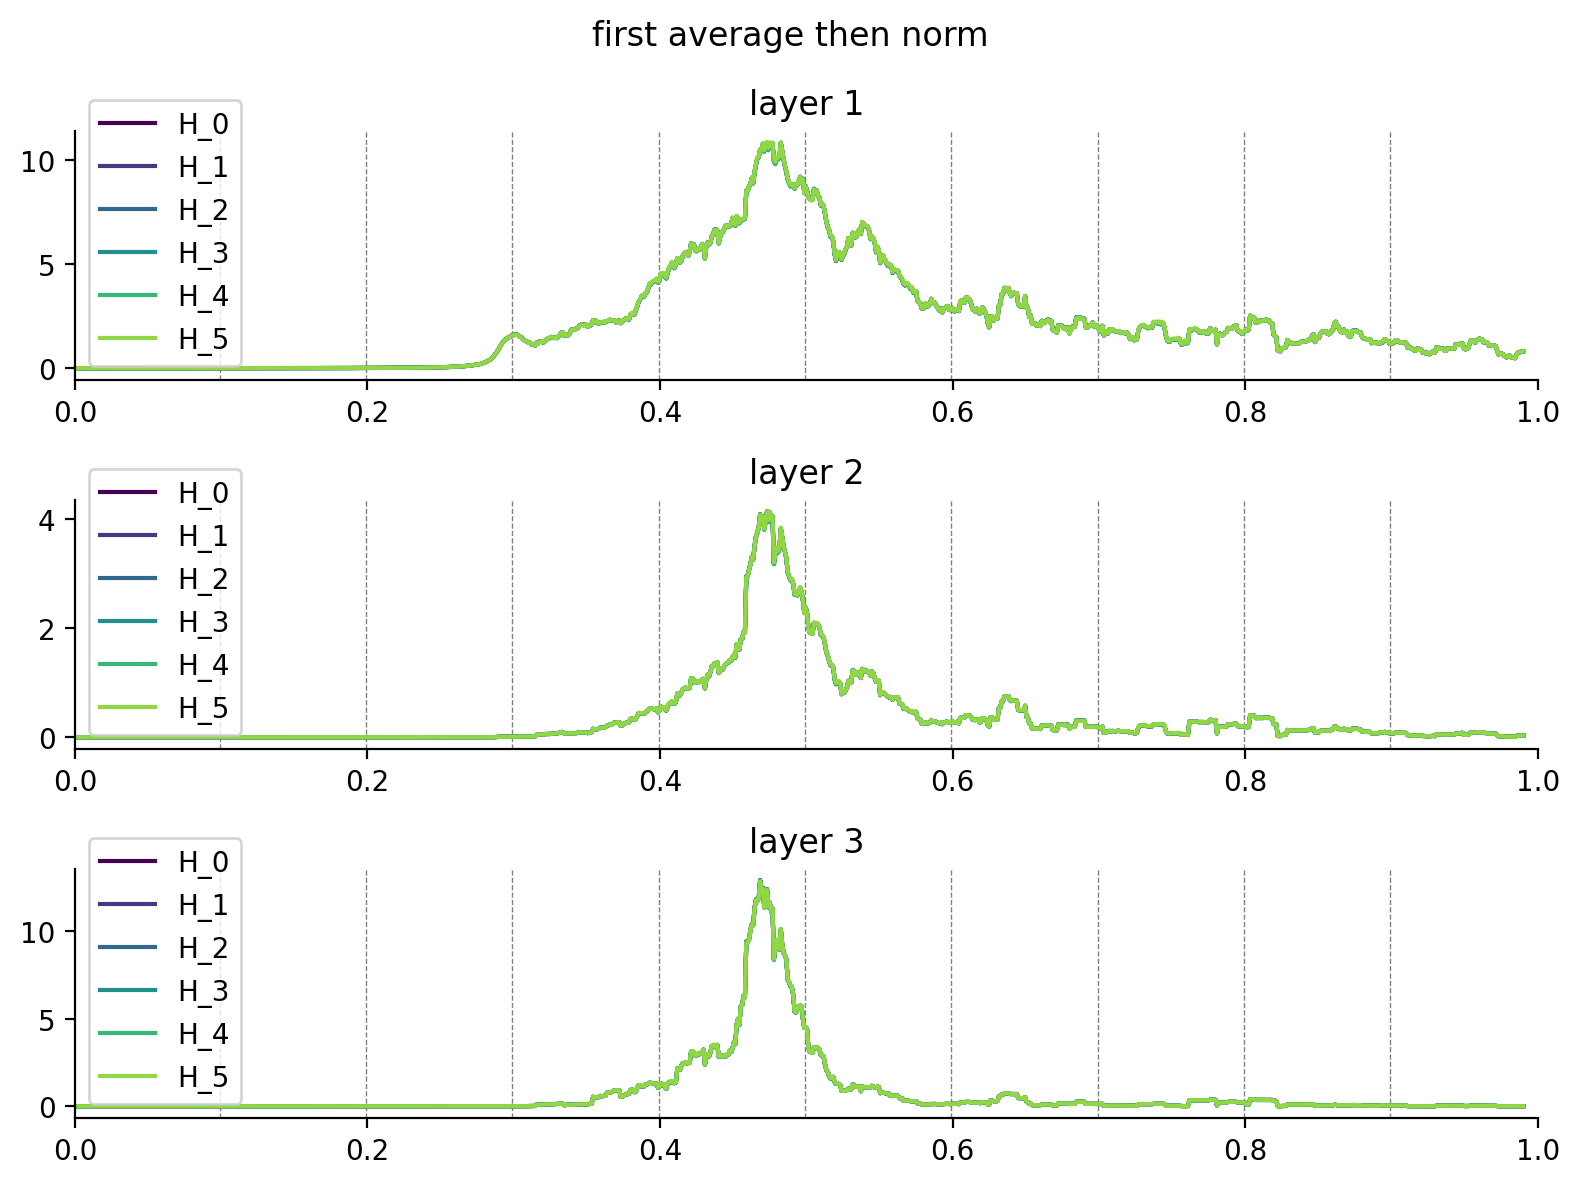

In [22]:
xmin=0
xmax=1
av_window=20
fig=plt.figure(1,figsize=(8,6),dpi=200,frameon=False)
for layer_name, layer_res in layer_gradient_dict.items():
    idx=layer_names.index(layer_name)
    ax1=plt.subplot(3,1,idx+1)
    #ax1=plt.subplot(2,3,1)
    training_l2=np.stack([[np.linalg.norm(x.mean(axis=0)) for x in y] for y in  layer_res]).transpose()
    for idy,res in enumerate(training_l2):

        ax1.plot(moving_average(x_bar,av_window),moving_average(res,av_window),label=f"H_{idy}",color=line_cols[idy,:],linewidth=1.5)
    ax1.legend()
    ax1.set_title(f"layer {idx+1}")
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    ax1.vlines(epoch_bar,ax1.get_ylim()[0],ax1.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
    ax1.autoscale(enable=True, axis='x', tight=True)
    ax1.autoscale(enable=True, axis='y', tight=True)
    ax1.set_xlim((xmin,xmax))

#ax1=plt.subplot(2,3,(7,8)
plt.suptitle('first average then norm')
plt.tight_layout()

In [26]:
np.mean(np.linalg.norm(layer_res[1][1],axis=1))

5.0250626e-10

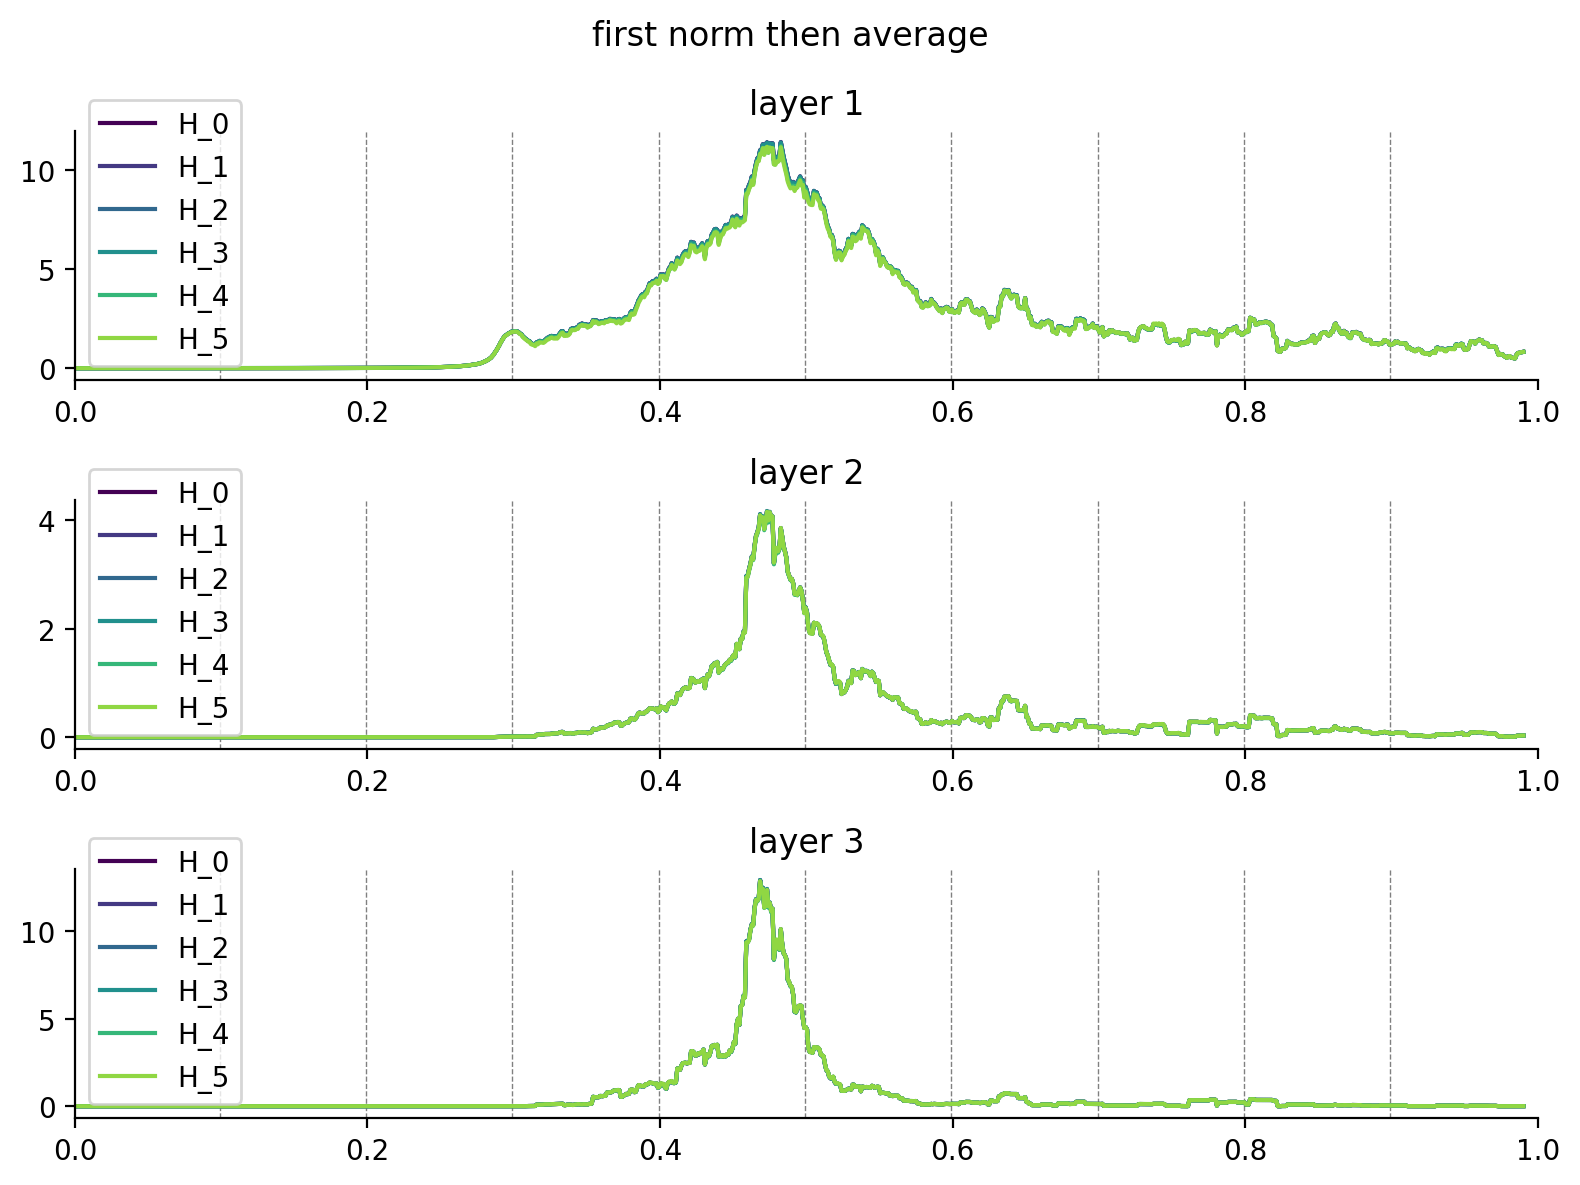

In [30]:
xmin=0
xmax=1
av_window=20
fig=plt.figure(1,figsize=(8,6),dpi=200,frameon=False)
for layer_name, layer_res in layer_gradient_dict.items():
    idx=layer_names.index(layer_name)
    ax1=plt.subplot(3,1,idx+1)
    #ax1=plt.subplot(2,3,1)
    training_l2=np.stack([[np.mean(np.linalg.norm(x,axis=1)) for x in y] for y in  layer_res]).transpose()
    for idy,res in enumerate(training_l2):

        ax1.plot(moving_average(x_bar,av_window),moving_average(res,av_window),label=f"H_{idy}",color=line_cols[idy,:],linewidth=1.5)
    ax1.legend()
    ax1.set_title(f"layer {idx+1}")
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    ax1.vlines(epoch_bar,ax1.get_ylim()[0],ax1.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5)
    ax1.autoscale(enable=True, axis='x', tight=True)
    ax1.autoscale(enable=True, axis='y', tight=True)
    ax1.set_xlim((xmin,xmax))

#ax1=plt.subplot(2,3,(7,8)
plt.suptitle('first norm then average')
plt.tight_layout()

In [29]:

np.linalg.norm(layer_res[1][1],axis=1)

(32,)

In [32]:
training_l2=np.stack([[np.linalg.norm(x.mean(axis=0)) for x in y] for y in  layer_gradient_dict['layer_3_Linear']])

[[<matplotlib.lines.Line2D at 0x2b1e9aa849e8>],

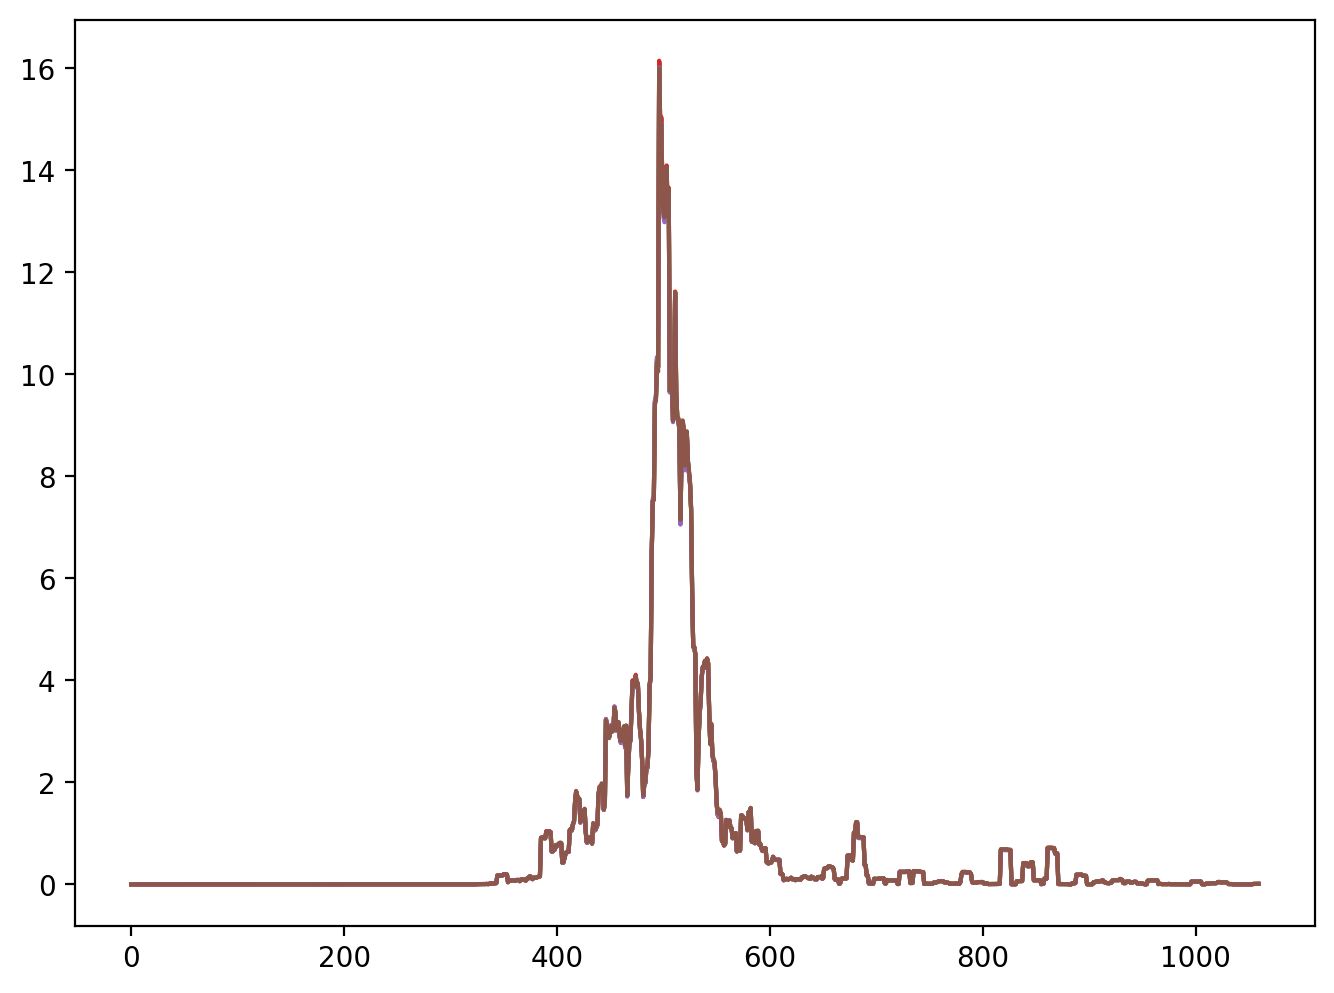

In [41]:
fig=plt.figure(1,figsize=(8,6),dpi=200,frameon=False)

[plt.plot(moving_average(x,av_window)) for x in np.stack(training_l2).transpose()]